In [1]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
import scipy.stats as stats
import os
import os.path as op
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import numpy.ma as ma
import matplotlib.cm as cm

import diff_classifier.msd as msd
import diff_classifier.features as ft
import diff_classifier.heatmaps as hm

from diff_viz.heatmaps import plot_heatmap, plot_scatterplot, plot_trajectories
from diff_viz.viscosity import viscosity_from_diffusion_coefficient

In [3]:
# get path to testing data folders
agarose_data_path = '/Users/nelsschimek/Documents/nancelab/Data/agarose/'

In [4]:
agarose_files = os.listdir(agarose_data_path)
agarose_files

['features_072623_Agarose_4mgml_40nm_vid_1.csv',
 'features_072623_Agarose_10mgml_40nm_vid_2.csv',
 'features_072623_Agarose_4mgml_40nm_vid_2.csv',
 'features_072623_Agarose_10mgml_40nm_vid_1.csv',
 'features_072623_Agarose_4mgml_40nm_vid_3.csv',
 '.DS_Store',
 'msd_072623_Agarose_4mgml_40nm_vid_3.csv',
 'msd_072623_Agarose_4mgml_40nm_vid_2.csv',
 'msd_072623_Agarose_4mgml_40nm_vid_1.csv',
 'msd_072623_Agarose_8mgml_40nm_vid_4.csv',
 'msd_072623_Agarose_10mgml_40nm_vid_2.csv',
 'msd_072623_Agarose_10mgml_40nm_vid_1.csv',
 'msd_072623_Agarose_8mgml_40nm_vid_2.csv',
 'features_072623_Agarose_12mgml_60x_40nm_vid_1.csv',
 'msd_072623_Agarose_8mgml_40nm_vid_3.csv',
 'msd_072623_Agarose_8mgml_40nm_vid_1.csv',
 'features_072623_Agarose_12mgml_60x_40nm_vid_2.csv',
 'features_072623_Agarose_12mgml_60x_40nm_vid_3.csv',
 'features_072623_Agarose_8mgml_40nm_vid_4.csv',
 'msd_072623_Agarose_12mgml_60x_40nm_vid_2.csv',
 'msd_072623_Agarose_12mgml_60x_40nm_vid_3.csv',
 'features_072623_Agarose_8mgml_

In [5]:
msd_agarose_4 = [file for file in agarose_files if 'msd' in file and '4mgml' in file]
feature_agarose_4 = [file for file in agarose_files if 'features' in file and '4mgml' in file]

msd_agarose_8 = [file for file in agarose_files if 'msd' in file and '8mgml' in file]
feature_agarose_8 = [file for file in agarose_files if 'features' in file and '8mgml' in file]

msd_agarose_10 = [file for file in agarose_files if 'msd' in file and '10mgml' in file]
feature_agarose_10 = [file for file in agarose_files if 'features' in file and '10mgml' in file]

msd_agarose_12 = [file for file in agarose_files if 'msd' in file and '12mgml' in file]
feature_agarose_12 = [file for file in agarose_files if 'features' in file and '12mgml' in file]

print(len(msd_agarose_4))   
print(len(feature_agarose_4))
print(len(msd_agarose_8))
print(len(feature_agarose_8))
print(len(msd_agarose_10))
print(len(feature_agarose_10))
print(len(msd_agarose_12))
print(len(feature_agarose_12))

3
3
4
4
2
2
3
3


In [9]:
features_df = pd.read_csv(agarose_data_path + feature_agarose_4[0])
features_df.shape

(292, 26)

In [10]:
features_df['Deff1']

0      2.032788
1      3.195516
2      2.323111
3      1.573734
4      1.913416
         ...   
287    4.824636
288    1.186367
289    1.416266
290    2.411855
291    2.710085
Name: Deff1, Length: 292, dtype: float64

In [11]:
clean = features_df.dropna(subset=['Deff1'])
clean = clean[clean['Deff1'] < 3]
clean.shape

(193, 26)

In [12]:
visc = viscosity_from_diffusion_coefficient(clean, 'Deff1', 287, 25*(10**-6),)
visc.describe()

count    1.930000e+02
mean     1.189540e-17
std      3.308649e-17
min      2.812115e-18
25%      3.799849e-18
50%      5.287809e-18
75%      7.459060e-18
max      3.363443e-16
Name: Deff1, dtype: float64

<Axes: >

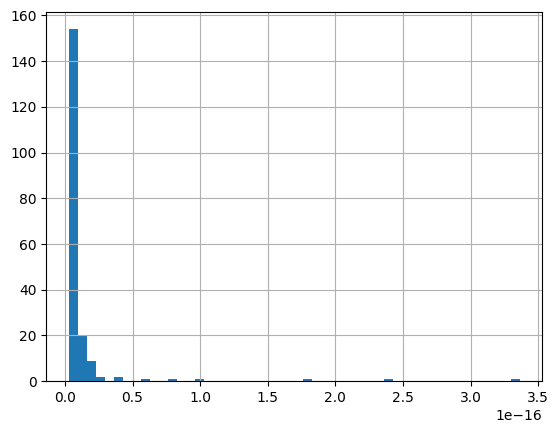

In [46]:
visc.hist(bins=50)

In [14]:
clean['viscosity'] = visc

Plotted {} heatmap successfully.


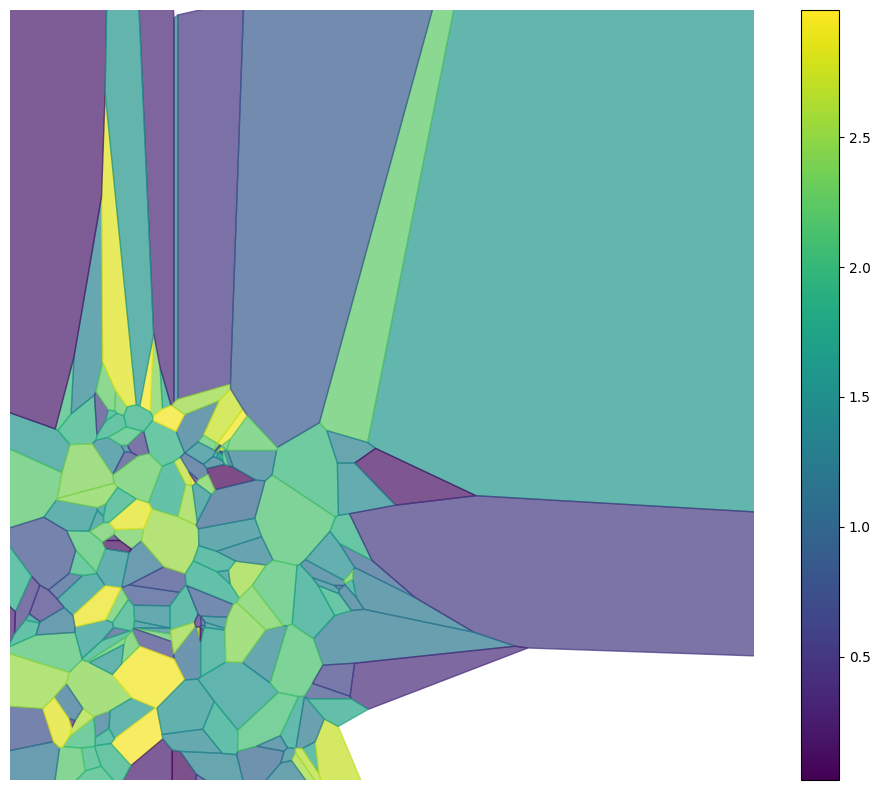

In [18]:
plot_heatmap(clean, 'Deff1', vmin=clean['Deff1'].min(), vmax=clean['Deff1'].max())

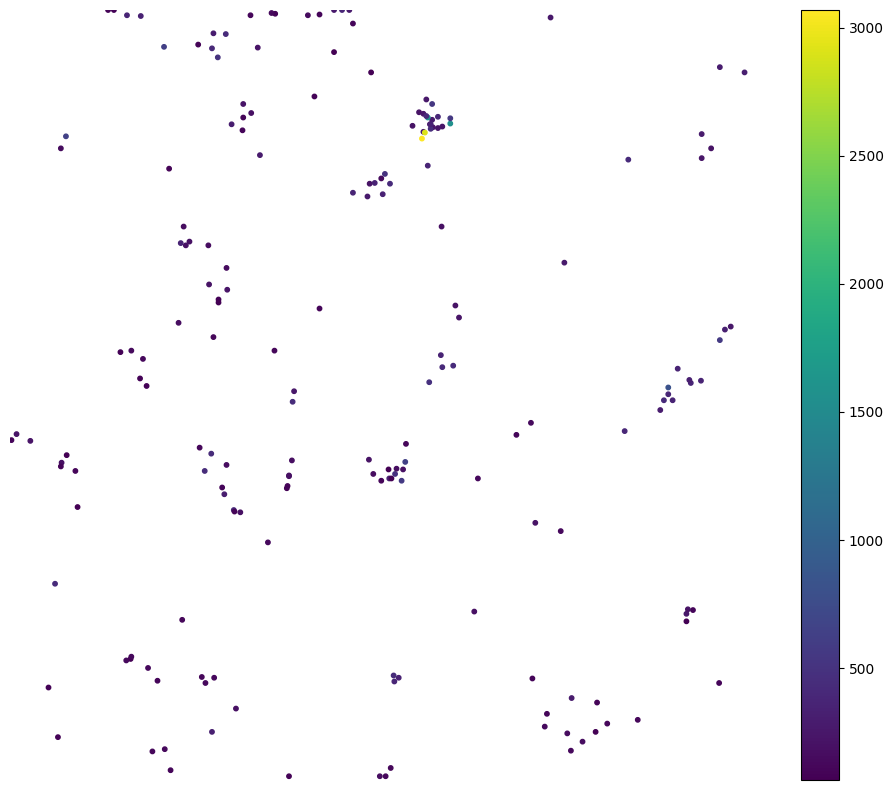

In [45]:
plot_scatterplot(clean, 'Quality', resolution=256, vmin=clean['Quality'].min(), vmax=clean['Quality'].max())

In [23]:
msd_df = pd.read_csv(agarose_data_path + msd_agarose_4[0])
msd_df.shape

(166005, 10)

In [42]:
clean.columns

Index(['Unnamed: 0', 'Track_ID', 'alpha', 'D_fit', 'kurtosis', 'asymmetry1',
       'asymmetry2', 'asymmetry3', 'AR', 'elongation', 'boundedness',
       'fractal_dim', 'trappedness', 'efficiency', 'straightness', 'MSD_ratio',
       'frames', 'X', 'Y', 'Quality', 'Mean_Intensity', 'SN_Ratio', 'Deff1',
       'Deff', 'Mu', 'Deff2', 'viscosity'],
      dtype='object')

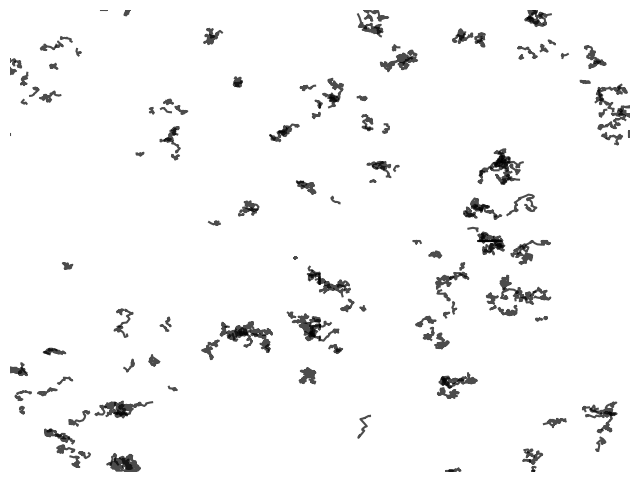

In [41]:
fig = plot_trajectories(msd_df, figsize=(8,6), resolution=256)
